<a href="https://colab.research.google.com/github/shiabc/machine-learning-models-practice/blob/main/EcomerceLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
df = pd.read_csv('/content/drive/MyDrive/Project_github/Regression/Ecommerce Customers.csv')

In [48]:
df.head(10)
df.tail(10)
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [49]:
table = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'Types':df.dtypes.values
})
table

,Unique,Null,NullPercent,Types
Email,500,0,0.0,object
Address,500,0,0.0,object
Avatar,138,0,0.0,object
Avg. Session Length,500,0,0.0,float64
Time on App,500,0,0.0,float64
Time on Website,500,0,0.0,float64
Length of Membership,500,0,0.0,float64
Yearly Amount Spent,500,0,0.0,float64


In [50]:
# Drop Email,Address,Avatar
drop = ['Email','Address','Avatar']
df = df.drop(drop,axis=1)

Exploratory Data Analysis


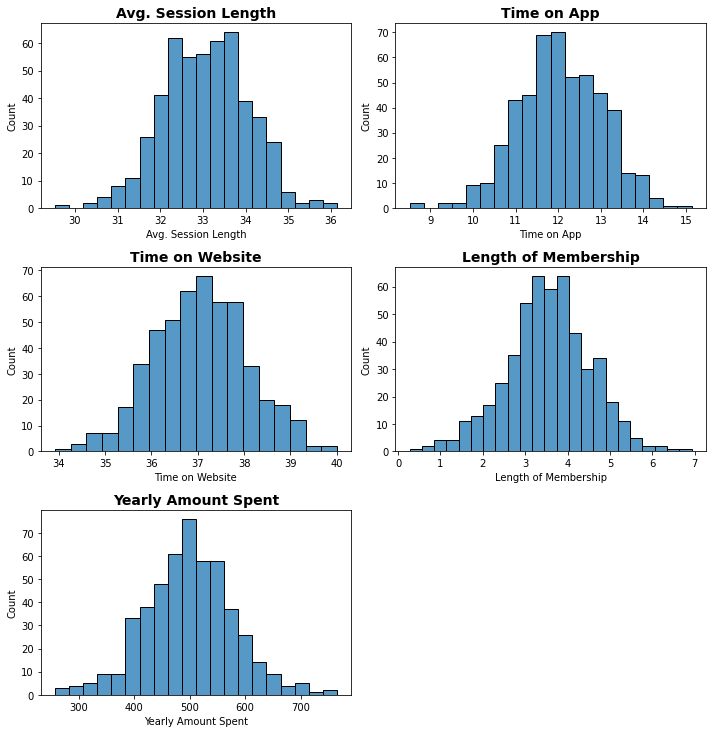

In [51]:
plt.figure(figsize=(10,20))
for i,num in enumerate(df.select_dtypes(exclude='O')):
    ax = plt.subplot(6,2, i + 1)
    sns.histplot(x=df[num])
    plt.title(num, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

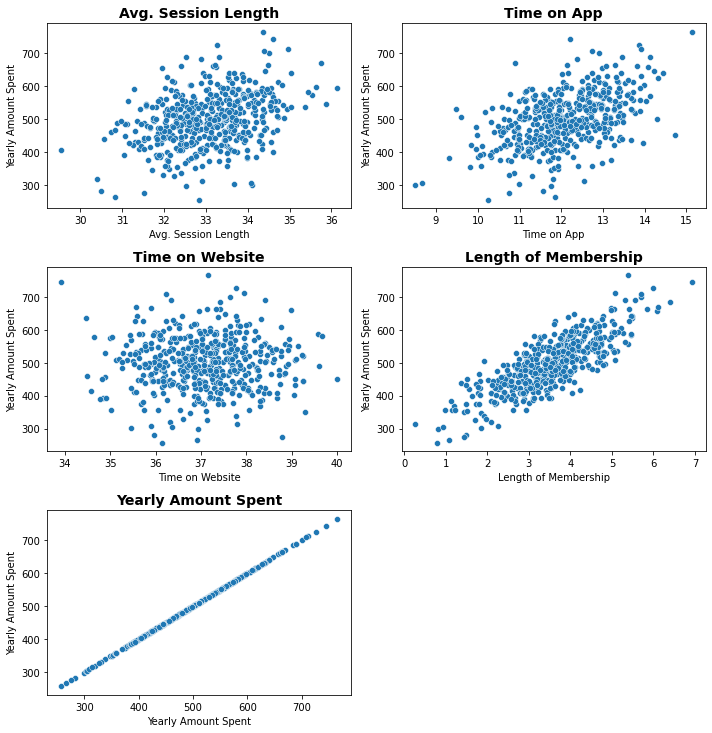

In [52]:
plt.figure(figsize=(10,20))
for i, num in enumerate(df.select_dtypes(exclude='O')):
    ax = plt.subplot(6, 2, i + 1)
    sns.scatterplot(x=num, y='Yearly Amount Spent', data=df)
    plt.title(num, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [60]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


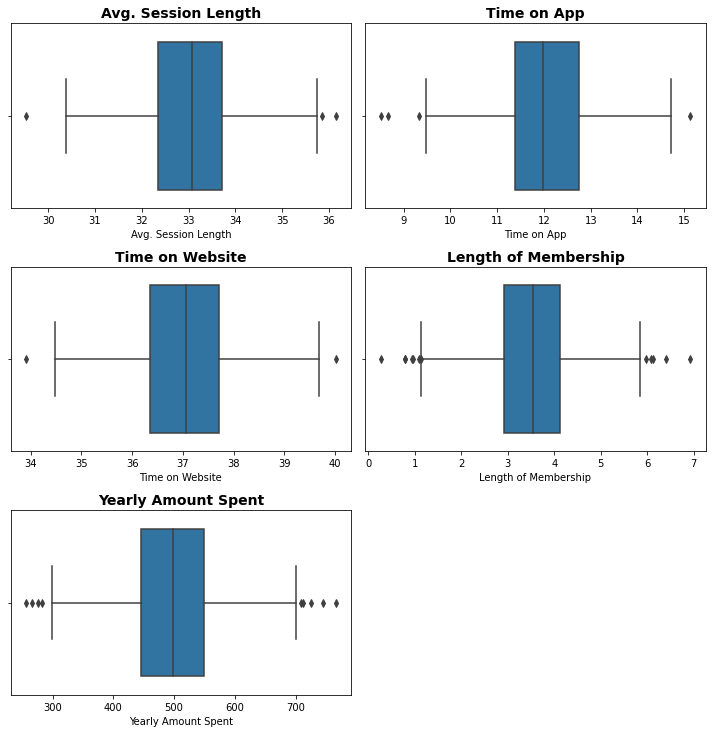

In [53]:
plt.figure(figsize=(10,20))
for i, num in enumerate(df.select_dtypes(exclude='O')):
    ax = plt.subplot(6, 2, i + 1)
    sns.boxplot(x=df[num])
    plt.title(num, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [55]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Fillter Outlier
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Train and Test

In [61]:
X = df_clean.drop('Yearly Amount Spent',axis=1)

In [63]:
y = df_clean['Yearly Amount Spent']

แบ่งข้อมูล 2 ชุด

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
X_train.shape

(333, 4)

In [68]:
X_test.shape

(143, 4)

Training Model

In [69]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
pd.DataFrame(lm.coef_, index=X.columns, columns=['Coeff'])

,Coeff
Avg. Session Length,25.907505
Time on App,39.086611
Time on Website,0.337925
Length of Membership,61.353485


In [72]:
y_pred = lm.predict(X_test)
y_pred

array([529.54428319, 563.42577029, 401.44463136, 485.94175542,
       504.2026916 , 402.90753916, 447.12319621, 442.60349353,
       451.77611883, 564.39861841, 449.42076847, 524.18187007,
       561.49952733, 488.7397519 , 472.96255278, 478.16838536,
       380.32318812, 515.48777683, 337.07885594, 443.93591569,
       529.40229425, 534.31567928, 506.32128377, 474.06226121,
       507.67146967, 552.05623546, 646.308023  , 542.13711227,
       577.84082385, 518.10142425, 587.21087849, 490.52667046,
       531.21616772, 423.83136707, 569.66131288, 540.74439411,
       408.6497792 , 407.84693058, 495.38309547, 554.59038965,
       513.37409055, 593.94874349, 383.75139851, 455.95793824,
       413.90654113, 500.48075312, 583.71966393, 401.88847631,
       548.08952171, 430.56594767, 481.90601858, 548.84236024,
       507.32075764, 488.65909099, 547.26448016, 477.65633476,
       477.35039662, 417.7634782 , 552.52864405, 461.09085343,
       497.27651409, 596.25301997, 457.44353058, 504.66

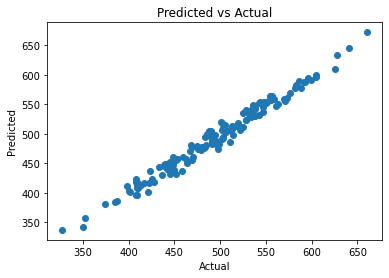

In [75]:
#plot y_pred and y_test
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute the mean squared error and R-squared values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 85.53369421026947
R-squared: 0.9787383936025739
